In [2]:
#from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
import time
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
import cartopy.crs as ccrs

dir_flux = 'F:/data/model_data/oaflux/data_v3/daily/turbulence/'
dir_cmc = 'F:/data/sst/cmc/CMC0.2deg/v2/'
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'



In [43]:
lyr=2017
syr=str(lyr)
filename = dir_flux + 'lh_oaflux_' + syr + '.nc';
ds_lh=xr.open_dataset(filename)
filename = dir_flux + 'sh_oaflux_' + syr + '.nc';
ds_sh=xr.open_dataset(filename)
ds_lh.lhtfl.attrs['long_name']='Latent heat flux'
ds_sh.shtfl.attrs['long_name']='Sensible heat flux'

In [44]:
ds_lh

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 365)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) int32 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    lhtfl    (time, lat, lon) float32 ...
    err      (time, lat, lon) float32 ...
Attributes:
    creation_date:  OCT 2018
    description:    WHOI Objectively Analyzed air-sea Fluxes (OAFlux) Project
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://oaflux.whoi.edu

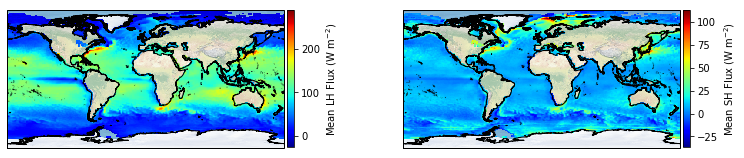

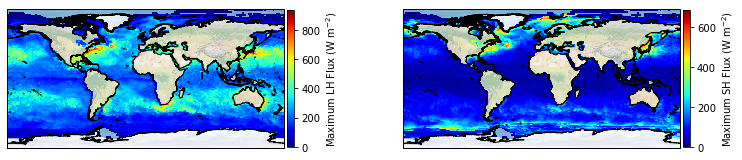

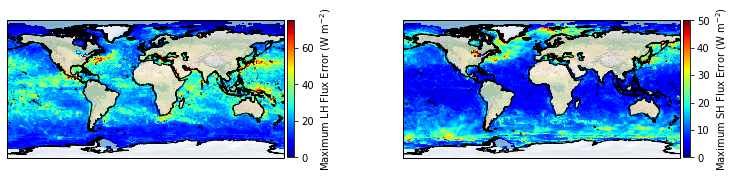

In [167]:
plt.figure(figsize=(13,3.6))
ax = plt.subplot(121, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,ds_lh.lhtfl.mean('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='Mean LH Flux (W m$^{-2}$)')

ax = plt.subplot(122, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,ds_sh.shtfl.mean('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='Mean SH Flux (W m$^{-2}$)')
plt.savefig('C:/Users/gentemann/Google Drive/f_drive/docs/proposals/nasa/EVI/JPL/2019_JPL_EVM3/gate2/2017_mean.png', dpi=100)

plt.figure(figsize=(13,3.6))
ax = plt.subplot(121, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_lh.lhtfl).max('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='Maximum LH Flux (W m$^{-2}$)')

ax = plt.subplot(122, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_sh.shtfl).max('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='Maximum SH Flux (W m$^{-2}$)')
plt.savefig('C:/Users/gentemann/Google Drive/f_drive/docs/proposals/nasa/EVI/JPL/2019_JPL_EVM3/gate2/2017_max.png', dpi=100)

plt.figure(figsize=(13,3.6))
ax = plt.subplot(121, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_lh.err).max('time'), vmin=0,vmax=75,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='Maximum LH Flux Error (W m$^{-2}$)')

ax = plt.subplot(122, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_sh.err).max('time'), vmin=0,vmax=50,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='Maximum SH Flux Error (W m$^{-2}$)')
plt.savefig('C:/Users/gentemann/Google Drive/f_drive/docs/proposals/nasa/EVI/JPL/2019_JPL_EVM3/gate2/2017_err.png', dpi=100)


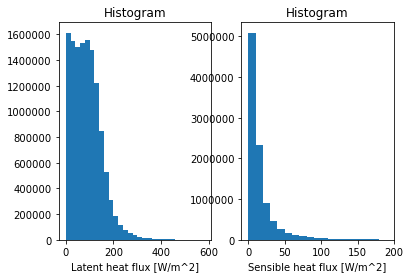

In [166]:
#ds_sh.shtfl.plot.hist(bins=np.arange(0,300,10))
plt.subplot(121)
ds_lh.lhtfl.plot.hist(bins=np.arange(0,600,20))
plt.subplot(122)
ds_sh.shtfl.plot.hist(bins=np.arange(0,200,10))
plt.savefig('C:/Users/gentemann/Google Drive/f_drive/docs/proposals/nasa/EVI/JPL/2019_JPL_EVM3/gate2/2017_hist.png', dpi=100)


In [169]:
#print out percentage of time that large fluxes occur
print('latent',100*(ds_lh.lhtfl.where(ds_lh.lhtfl>200).count()/ds_lh.lhtfl.where(ds_lh.lhtfl<1000).count()).data)
print('sensible',100*(ds_sh.shtfl.where(ds_sh.shtfl>50).count()/ds_sh.shtfl.where(ds_sh.shtfl<1000).count()).data)

latent 4.158051665167706
sensible 5.304032667736235


In [87]:
print('latent',ds_lh.lhtfl.max({'lat','lon'})
print('sensible',ds_sh.shtfl.max({'lat','lon'}).count()/ds_sh.shtfl.where(ds_sh.shtfl<1000).count().data)

<xarray.DataArray 'lhtfl' ()>
array(0.006333)

days with LHF>700 <xarray.DataArray 'lhtfl' ()>
array(40)


(array([  0.,   0.,   0.,  33., 141.,  96.,  55.,  31.,   5.]),
 array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900]),
 <a list of 9 Patch objects>)

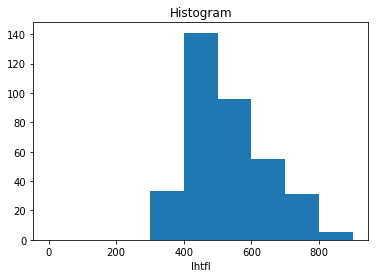

In [105]:
tem=ds_lh.lhtfl.max({'lat','lon'})
print('days with LHF>700',tem.where(tem>700).count())
tem.plot.hist(bins=np.arange(0,1000,100))

days with LHF error >75 <xarray.DataArray 'err' ()>
array(141)


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  3.,  1.,  3.,  4.,  6.,  5.,  1.,  7.,  7.,
         6.,  5.,  8.,  8.,  8., 13.,  9.,  8.,  6.,  7., 12.,  6.,  8.,
         7., 14., 13.,  9.,  7., 13.,  5.,  6.,  4.,  4.,  5., 14.,  5.,
         9.,  7.,  9.,  5.,  5.,  7.,  2.,  5.,  2.,  6.,  4.,  2.,  4.,
         3.,  2.,  0.,  3.,  1.,  2.,  4.,  2.,  0.,  1.,  4.,  2.,  1.,
         2.,  1.,  1.,  2.,  2.,  1.,  0.,  3.,  1.,  0.,  0.,  1.,  0.,
         1.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26

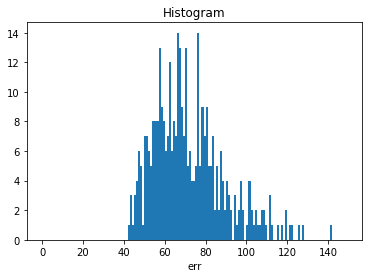

In [106]:
tem=ds_lh.err.max({'lat','lon'})
print('days with LHF error >75',tem.where(tem>75).count())
tem.plot.hist(bins=np.arange(0,150))

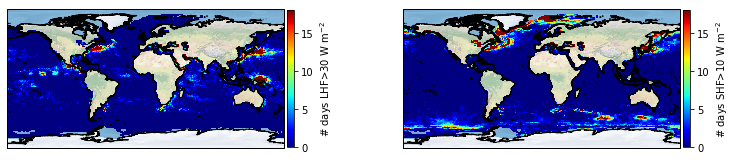

In [168]:
tem=ds_lh.lhtfl.where(ds_lh.err>30).count({'time'})
tem=tem.where(np.isfinite(ds_lh.lhtfl[0,:,:]),np.nan)
plt.figure(figsize=(13,3.6))
ax = plt.subplot(121, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(tem.lon,tem.lat,tem, vmin=0,vmax=18,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='# days LHF>30 W m$^{-2}$')
tem=ds_sh.shtfl.where(ds_sh.err>15).count({'time'})
tem=tem.where(np.isfinite(ds_lh.lhtfl[0,:,:]),np.nan)
ax = plt.subplot(122, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(tem.lon,tem.lat,tem, vmin=0,vmax=18,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='# days SHF>10 W m$^{-2}$')
plt.savefig('C:/Users/gentemann/Google Drive/f_drive/docs/proposals/nasa/EVI/JPL/2019_JPL_EVM3/gate2/2017_num_days.png', dpi=100)


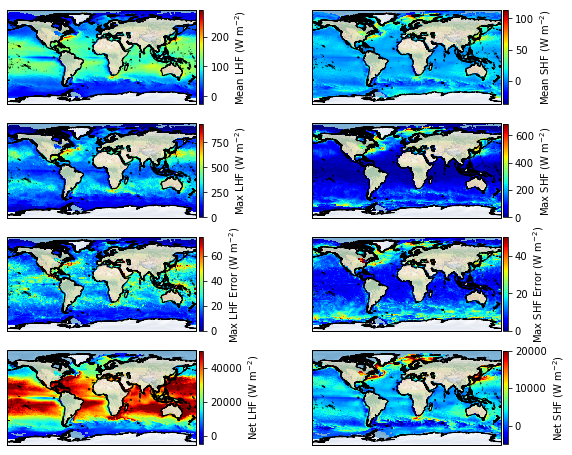

In [183]:
plt.figure(figsize=(10,8))
ax = plt.subplot(421, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,ds_lh.lhtfl.mean('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Mean LHF (W m$^{-2}$)')

ax = plt.subplot(422, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,ds_sh.shtfl.mean('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Mean SHF (W m$^{-2}$)')

ax = plt.subplot(423, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_lh.lhtfl).max('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Max LHF (W m$^{-2}$)')

ax = plt.subplot(424, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_sh.shtfl).max('time'), transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Max SHF (W m$^{-2}$)')

ax = plt.subplot(425, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_lh.err).max('time'), vmin=0,vmax=75,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Max LHF Error (W m$^{-2}$)')

ax = plt.subplot(426, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,np.abs(ds_sh.err).max('time'), vmin=0,vmax=50,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Max SHF Error (W m$^{-2}$)')

tem=ds_lh.lhtfl.sum('time')
tem=tem.where(np.isfinite(ds_lh.lhtfl[0,:,:]),np.nan)
ax = plt.subplot(427, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,tem, vmin=-5000,vmax=50000,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Net LHF (W m$^{-2}$)')

tem=ds_sh.shtfl.sum('time')
tem=tem.where(np.isfinite(ds_lh.lhtfl[0,:,:]),np.nan)
ax = plt.subplot(428, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,tem, vmin=-5000,vmax=20000,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Net SHF (W m$^{-2}$)')
plt.savefig('C:/Users/gentemann/Google Drive/f_drive/docs/proposals/nasa/EVI/JPL/2019_JPL_EVM3/gate2/2017_all.png', dpi=100)


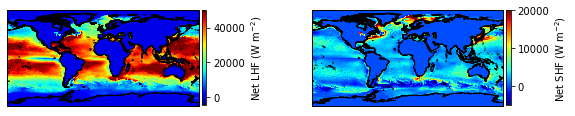

In [182]:
plt.figure(figsize=(10,6))
ax = plt.subplot(321, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,ds_lh.lhtfl.sum('time'), vmin=-5000,vmax=50000,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Net LHF (W m$^{-2}$)')

ax = plt.subplot(322, projection=ccrs.PlateCarree())
ax.background_img(name='ne_shaded', resolution='low')
mm = ax.pcolormesh(ds_lh.lon,ds_lh.lat,ds_sh.shtfl.sum('time'), vmin=-5000,vmax=20000,transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.colorbar(mm,ax=ax,shrink=.99,pad=.01,label='Net SHF (W m$^{-2}$)')
